<a href="https://colab.research.google.com/github/wjy4399/smoking_detection/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/wjy4399/smoking_detection/blob/main/notebooks/train-yolo11-object-detection-on-custom-dataset.ipynb)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Sun Dec 22 04:27:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="kNjHdFAhgnL6TGAaVRtX")
project = rf.workspace("wu-hulin").project("smokier-ixpfr-z5anv")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to smokier-1 in yolov11:: 100%|██████████| 1994/1994 [00:00<00:00, 3294.84it/s]


In [1]:
!git clone https://github.com/wjy4399/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 31718, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 31718 (delta 142), reused 60 (delta 55), pack-reused 31500 (from 5)
Receiving objects: 100% (31718/31718), 18.42 MiB | 8.15 MiB/s, done.
Resolving deltas: 100% (23084/23084), done.


In [4]:
!python /content/ultralytics/yolo11-HTB.py

WARNING ⚠️ no model scale passed. Assuming scale='n'.
Transferred 288/523 items from pretrained weights
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/ultralytics/ultralytics/cfg/models/11/yolo11-HTB.yaml, data=/content/smokier-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=/content/yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=Fal

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_noise(img, value=10):
    noise = np.random.uniform(0, 256, img.shape[:2]).astype(np.uint8)
    v = value * 0.01
    noise[noise < (256 - v)] = 0
    k = np.array([[0, 0.1, 0], [0.1, 8, 0.1], [0, 0.1, 0]])
    noise = cv2.filter2D(noise, -1, k)
    return noise

def rain_blur(noise, length=10, angle=0, w=1):
    trans = cv2.getRotationMatrix2D((length / 2, length / 2), angle - 45, 1 - length / 100.0)
    dig = np.diag(np.ones(length))
    k = cv2.warpAffine(dig, trans, (length, length))
    k = cv2.GaussianBlur(k, (w, w), 0)
    blurred = cv2.filter2D(noise, -1, k)
    cv2.normalize(blurred, blurred, 0, 255, cv2.NORM_MINMAX)
    return blurred.astype(np.uint8)

def alpha_rain(rain, img, beta=0.8):
    rain = np.expand_dims(rain, 2)
    rain_effect = np.concatenate((img, rain), axis=2)
    rain_result = img.copy()
    rain = rain.astype(np.float32)
    for i in range(3):  # 对每个通道处理
        rain_result[:, :, i] = rain_result[:, :, i] * (255 - rain[:, :, 0]) / 255.0 + beta * rain[:, :, 0]
    return rain_result

# 主流程
img = cv2.imread(r'/content/smokier-1/test/images/1013_jpg.rf.56760d4302cf63bb488649bdfc224158.jpg')

# 生成噪声
noise = get_noise(img, value=100)

# 生成模糊雨滴
rain = rain_blur(noise, length=20, angle=-30, w=1)

# 叠加雨滴效果
rain_effect = alpha_rain(rain, img, beta=0.4)

# 自动保存为副本
output_path = r'/content/smokier-1/test/images/rain_effect_result.jpg'
cv2.imwrite(output_path, rain_effect)

# 显示保存结果路径
print(f"雨景效果已保存到: {output_path}")


In [15]:
!python /content/ultralytics/predict.py


image 1/1 /content/Figure_1.png: 480x640 (no detections), 60.9ms
Speed: 2.1ms preprocess, 60.9ms inference, 20.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/ultralytics/runs/detect/predict2
0 label saved to /content/ultralytics/runs/detect/predict2/labels
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'cigarette', 1: 'smoking'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[2

In [6]:
import shutil

def compress_folder(folder_path):
    folder_path = folder_path.rstrip("/\\")
    shutil.make_archive(folder_path, 'zip', folder_path)

# Example usage
if __name__ == "__main__":
    compress_folder("/content/ultralytics/runs/detect/train2")

## Custom Training

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt epochs=30 imgsz=640 plots=True

/content
100% 5.35M/5.35M [00:00<00:00, 92.5MB/s]
WARNING ⚠️ 'data' argument is missing. Using default 'data=coco8.yaml'.
New https://pypi.org/project/ultralytics/8.3.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False,

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [7]:
!ls /content/ultralytics/runs/detect/train2

args.yaml					     R_curve.png	  val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv	  val_batch0_pred.jpg
confusion_matrix.png				     results.png	  val_batch1_labels.jpg
events.out.tfevents.1734848300.8ad3138551c8.14606.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					     train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				     train_batch2.jpg	  val_batch2_pred.jpg
labels.jpg					     train_batch3960.jpg  weights
P_curve.png					     train_batch3961.jpg
PR_curve.png					     train_batch3962.jpg


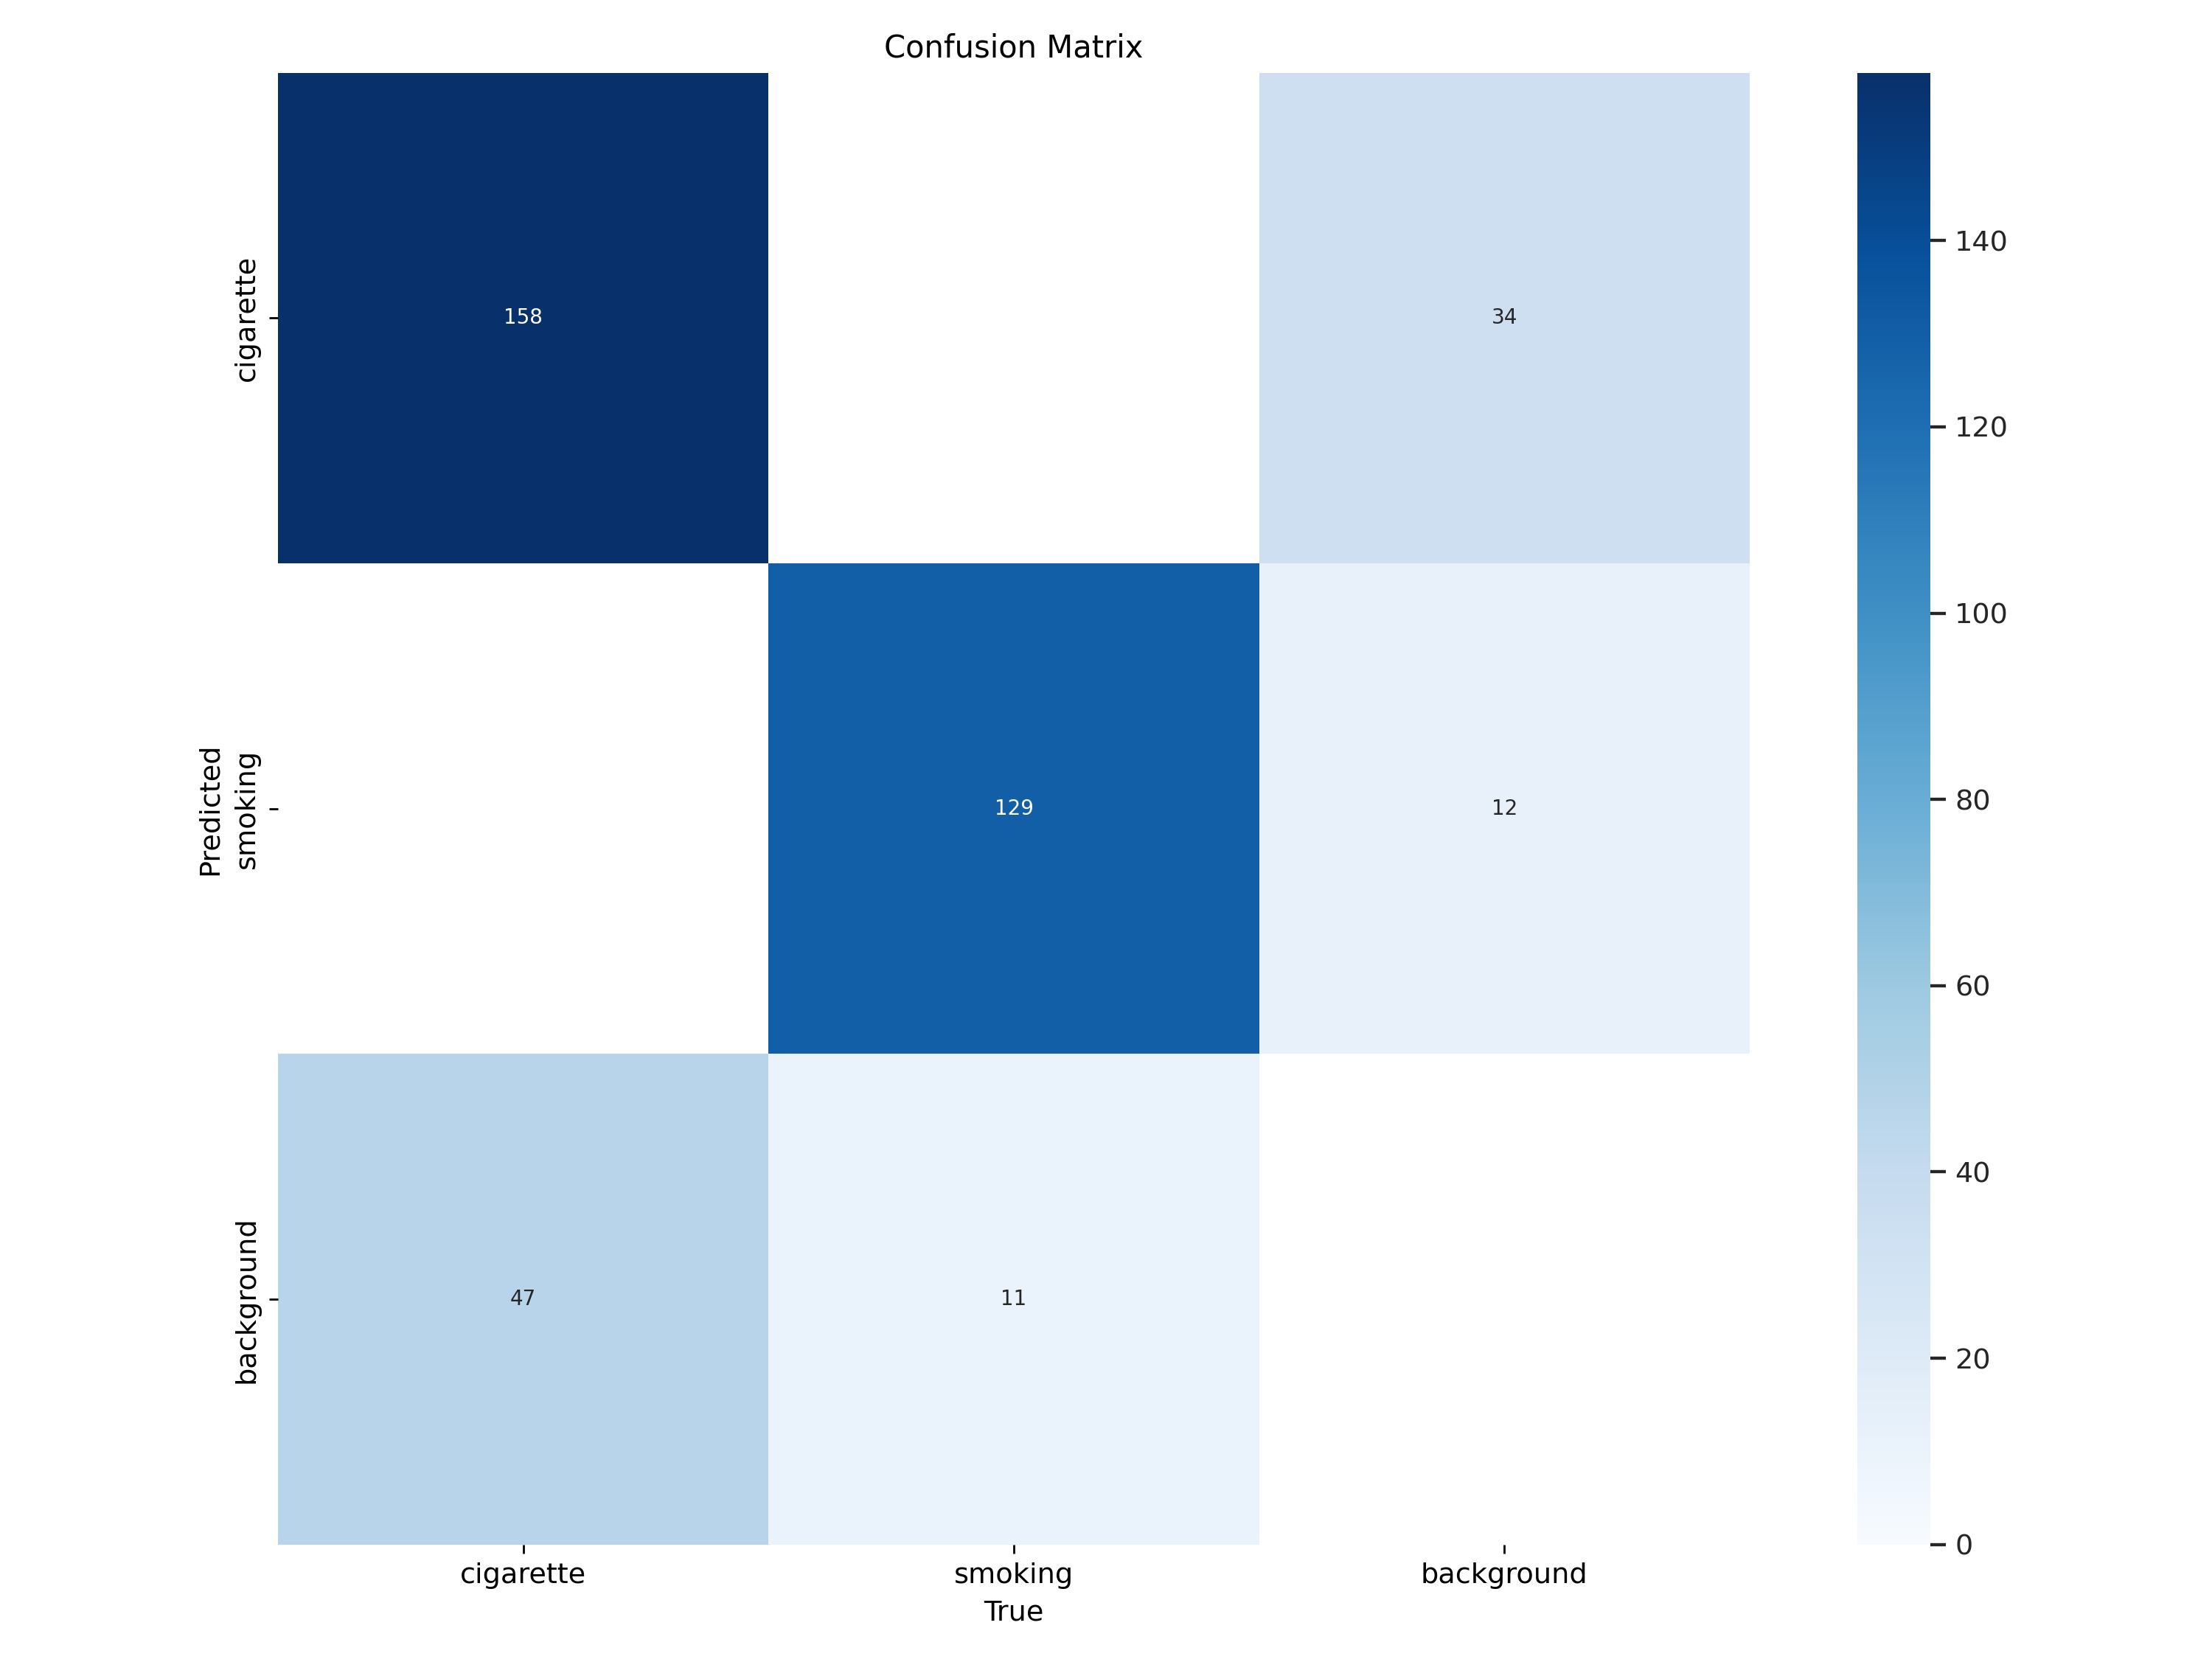

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/ultralytics/runs/detect/train2/confusion_matrix.png', width=600)

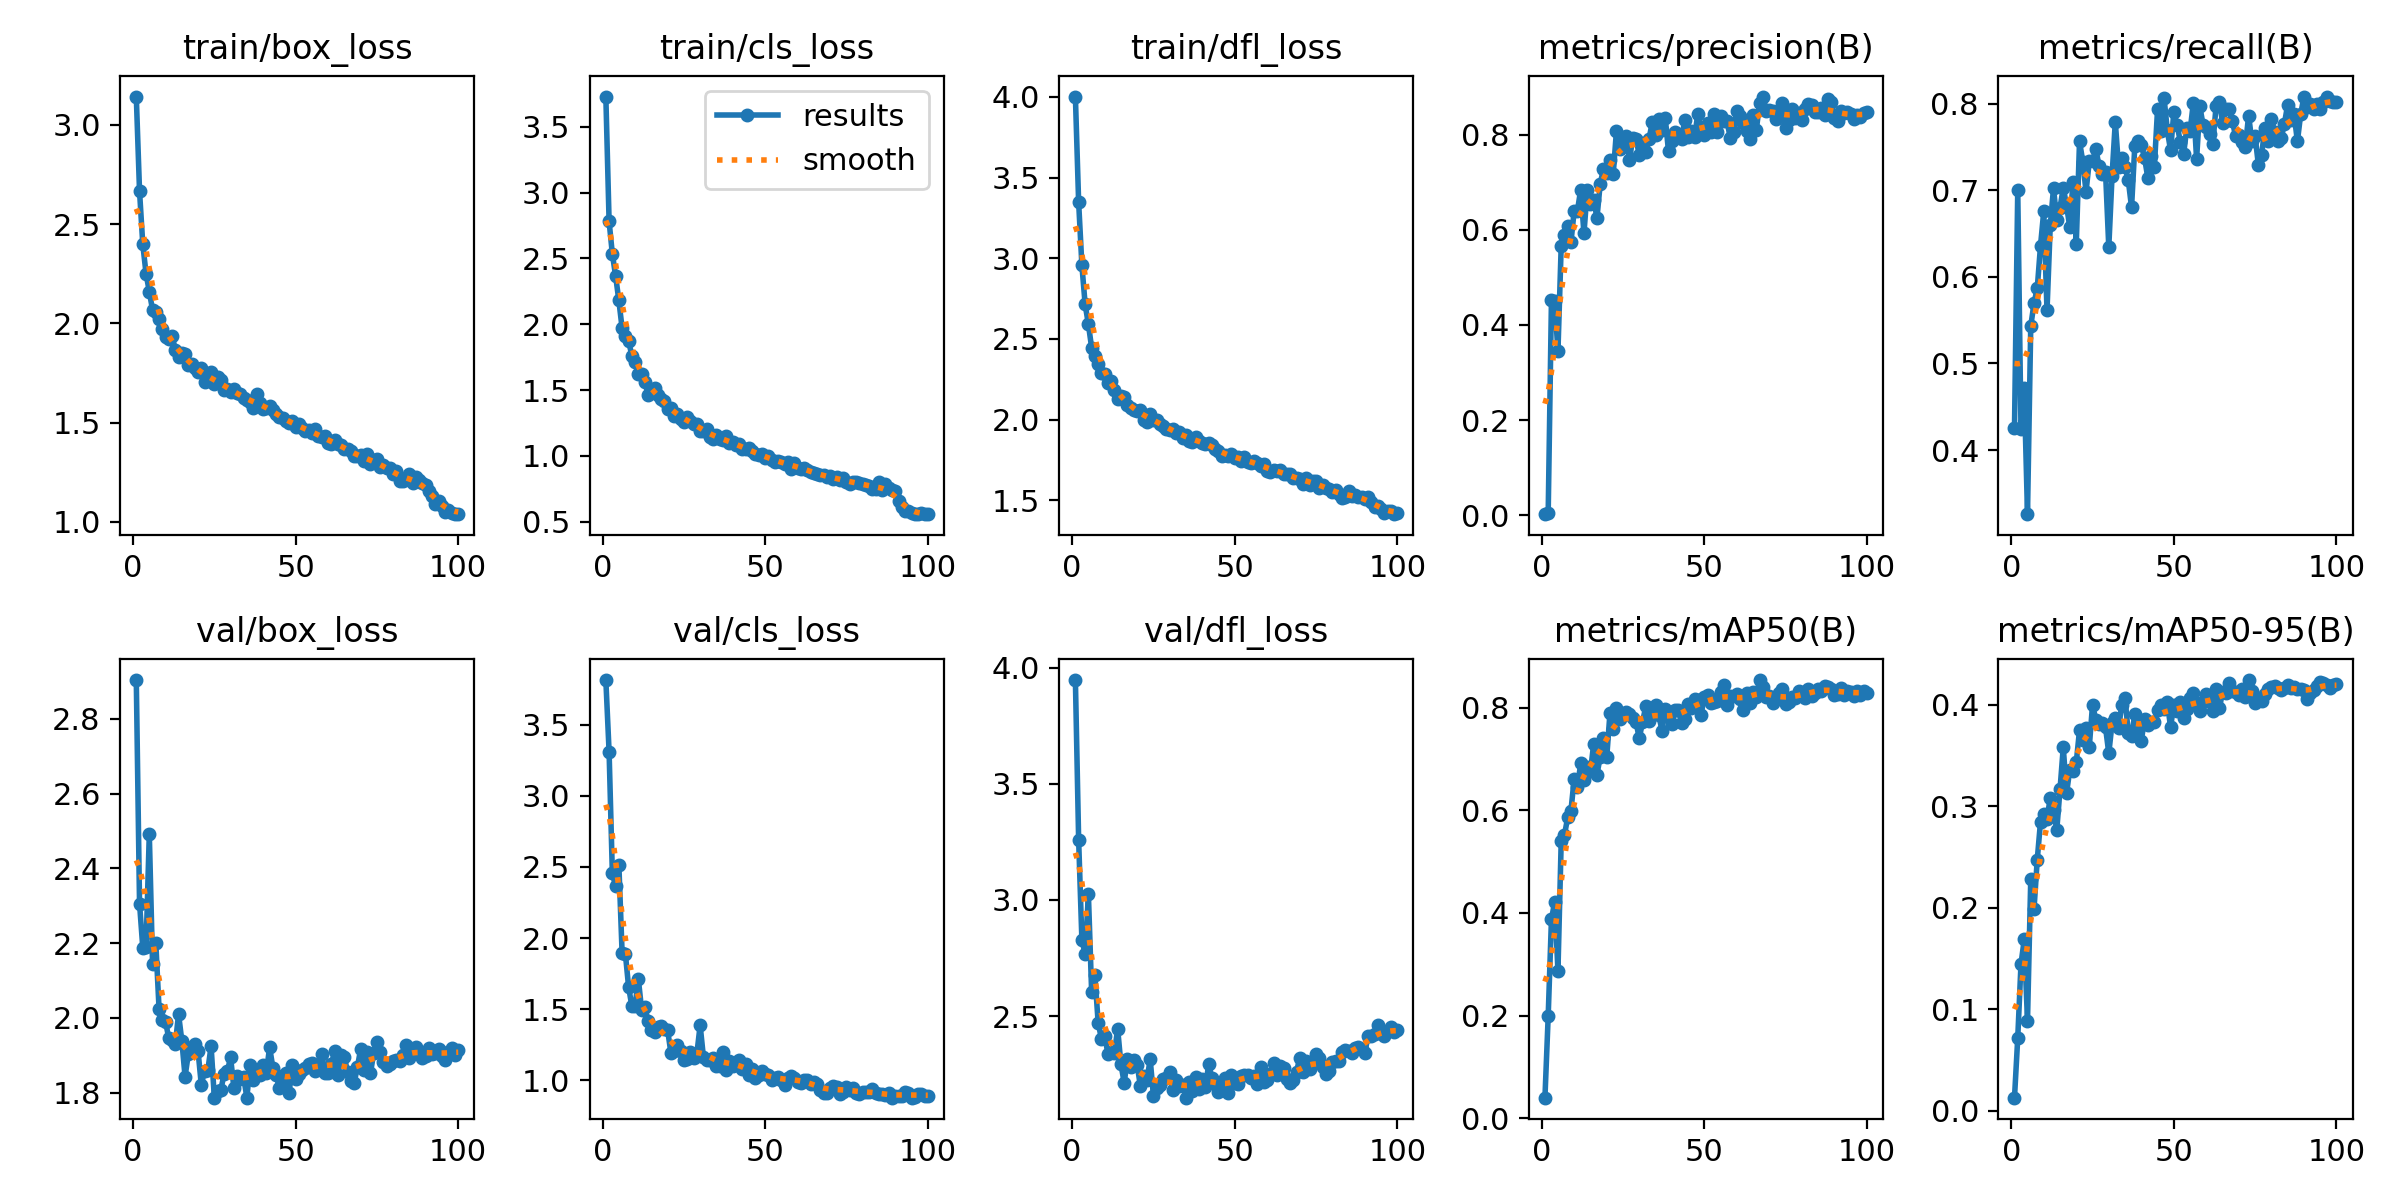

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/ultralytics/runs/detect/train2/results.png', width=600)

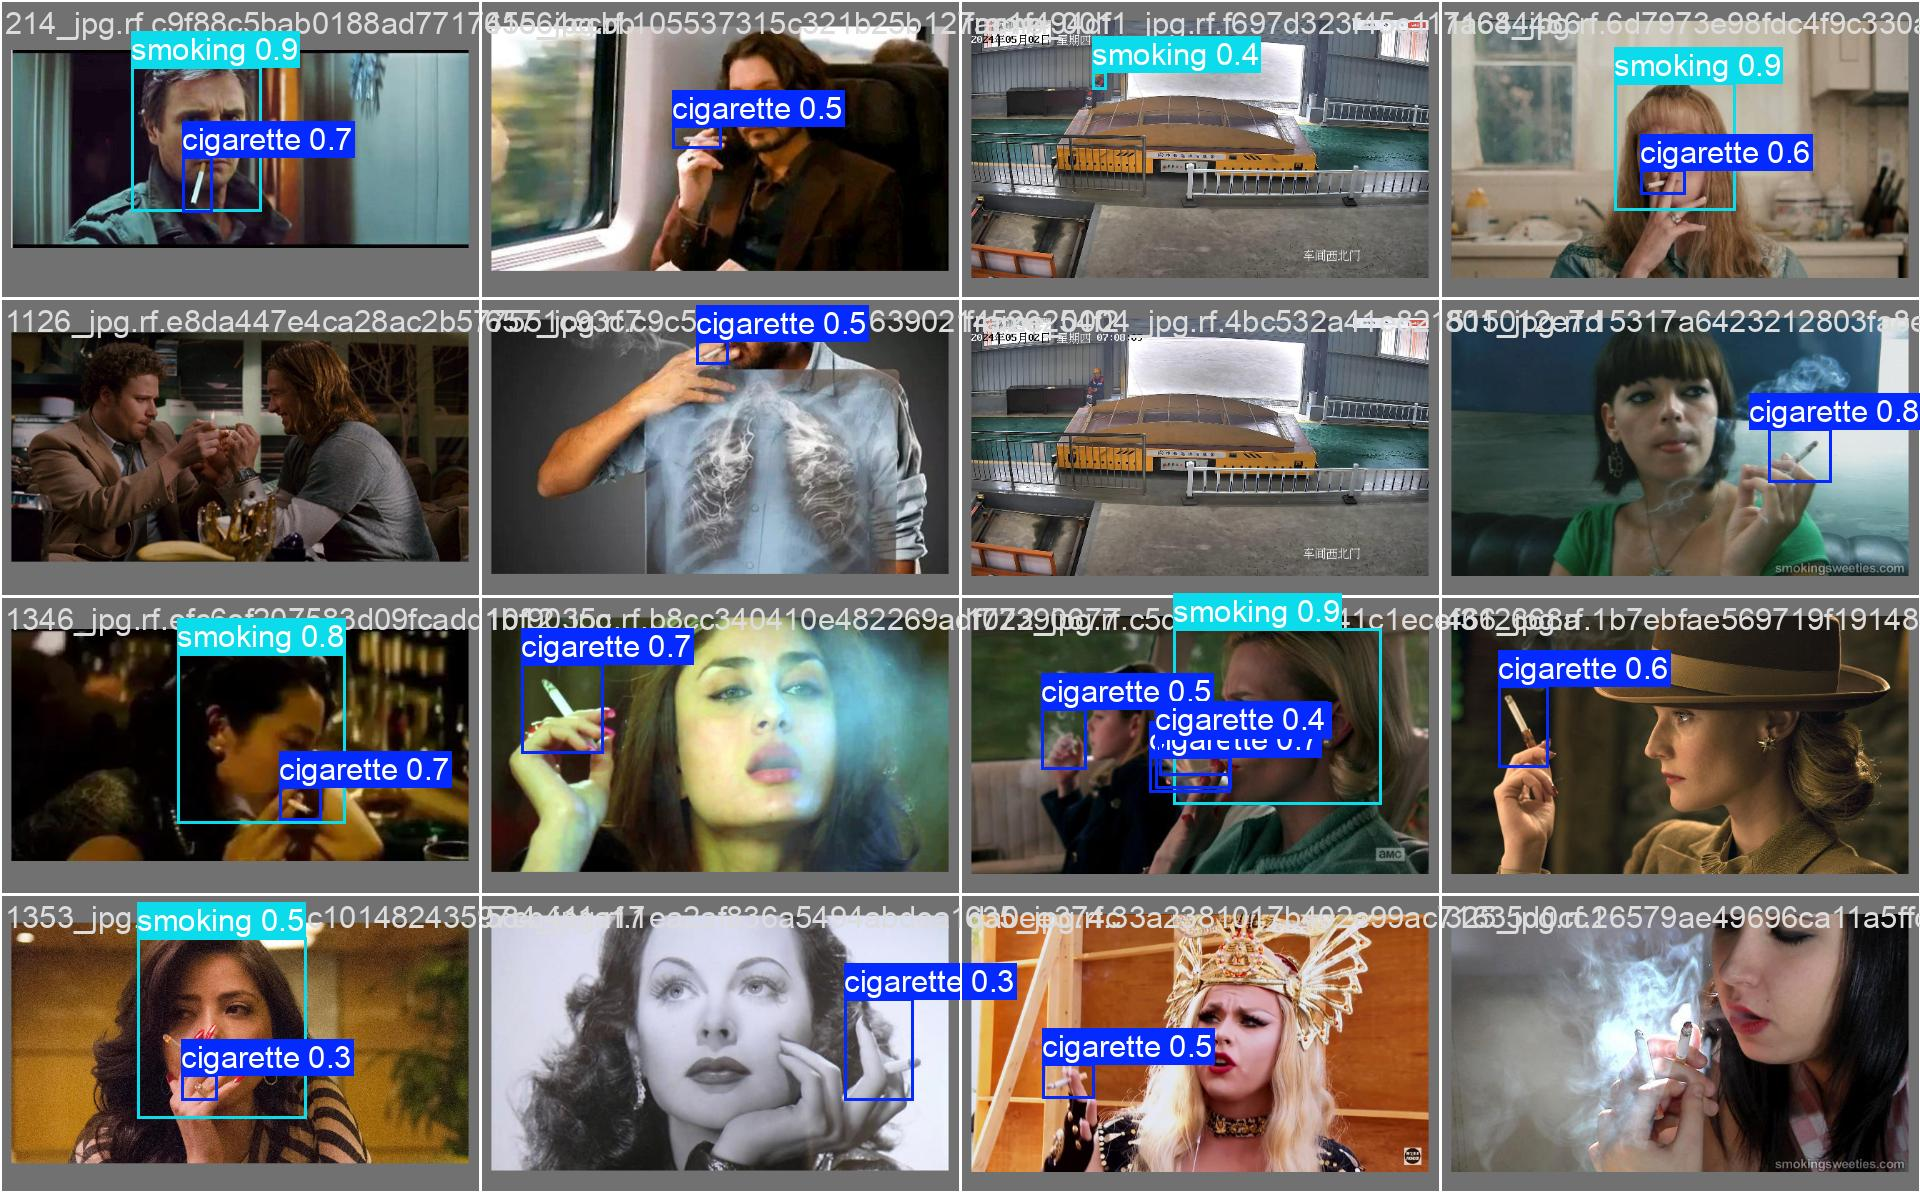

In [10]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/ultralytics/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [12]:
!yolo task=detect mode=val model=/content/ultralytics/runs/detect/train2/weights/best.pt data=/content/smokier-1/data.yaml

/bin/bash: line 1: yolo: command not found


## Inference with custom model

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True